In [58]:
# 길이가 25cm에 무게가 150g인 도미를 넣어 predict했더니 빙어하고 한다.

# 길이, 무게 데이터 셋 만들기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [59]:
import numpy as np

# np.column_stack = 전달받은 [리스트]를 2차원 데이터로 반환
# [EX]

np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [60]:
fish_data=np.column_stack((fish_length,fish_weight))

In [61]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [62]:
# 넘파이 zeros, ones는 파라미터로 받은 정수 크기만큼 0또는 1로 채움
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [63]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [64]:
# train 셋, test 셋 나누면서 셔플도 해주는 함수 임포트
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42)

In [65]:
# default =train(75%), test(25%)


In [66]:
# 데이터 형태 확인
print(train_input.shape,test_input.shape)
print(train_target.shape,test_target.shape )

(36, 2) (13, 2)
(36,) (13,)


In [67]:
# 데이터가 잘 섞였는지 확인
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [68]:
# stratify 파라미터는 target 시리즈를 전달하면 클래스의 비율에 맞게 데이터를 나눔
train_input,test_input,train_target,test_target=train_test_split(
    fish_data,fish_target,
    stratify=fish_target ,random_state=42)

In [69]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [70]:
# 문제 해결을 위해 모델 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.fit(test_input,test_target)

KNeighborsClassifier()

In [71]:
print(kn.predict([[25,150]]))

# 0은 빙어, 1 도미

[0.]


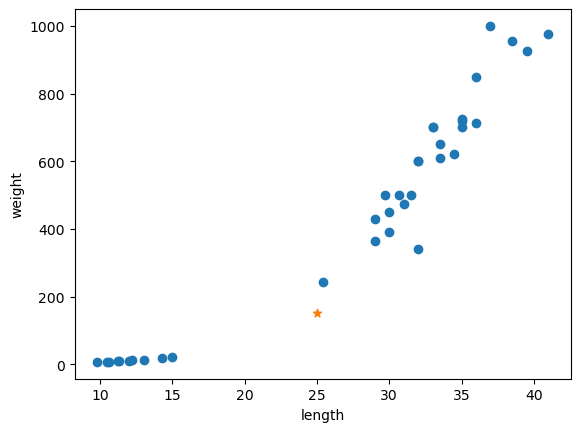

In [72]:
import matplotlib.pyplot as plt

# 25,150 좌표 확인

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="*")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [73]:
# 모델 파라미터
# 이 샘플의 주변값을 수치로 확인
distance, index=kn.kneighbors([[25,150]])
print(distance,index)


[[137.17988191 140.00603558 140.62090883 140.72046759 140.99677301]] [[ 5 10  3  1  0]]


In [74]:
train_input[index]

array([[[  29. ,  430. ],
        [  37. , 1000. ],
        [  11.3,    8.7],
        [  12.2,   12.2],
        [  29.7,  500. ]]])

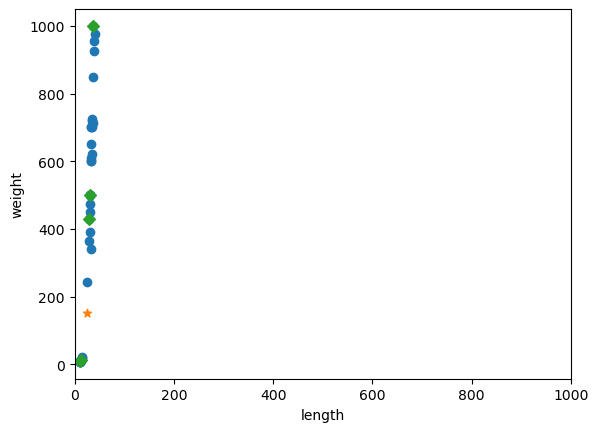

In [75]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="*")
plt.scatter(train_input[index,0],train_input[index,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.xlim((0,1000))
plt.show()

In [76]:
train_input[:3]

array([[ 29.7, 500. ],
       [ 12.2,  12.2],
       [ 33. , 700. ]])

In [77]:
# 표준화
# 학습 데이터의 길이 평균, 무게 평균 = mean
# 길이의 편차와 무게편차 = std
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

In [78]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [79]:
# z-score ( 표준점수 )는 양수냐, 음수냐, 크다, 작다는 상관없다.
# 다른 벡터와 얼만큼의 차이를 가지냐(비율 거리)가 유의함.

train_scaled=(train_input-mean)/std

print(train_scaled[:5])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


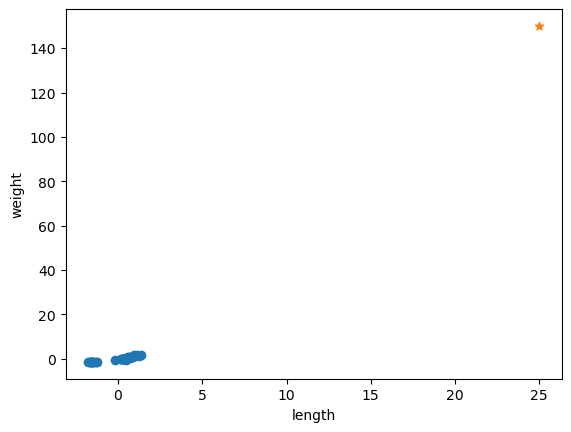

In [80]:
import matplotlib.pyplot as plt

# 25,150 좌표 확인
# test 셋(샘플)도 표준화 처리해줘야 함

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker="*")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [81]:
# 샘플 표준화 처리
new=([25,150]-mean)/std
print(new)

[-0.23012627 -0.94060693]


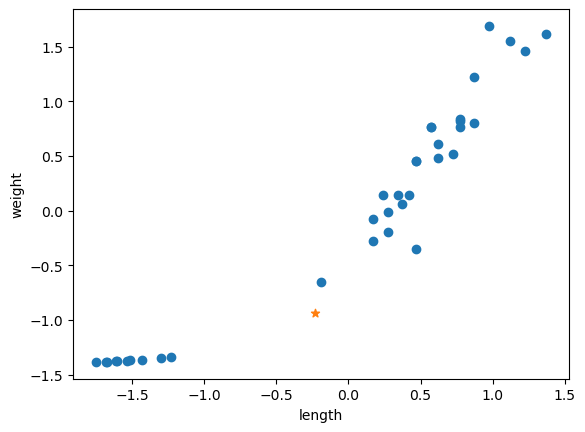

In [82]:
import matplotlib.pyplot as plt

# 25,150 좌표 확인
# test 셋(샘플)도 표준화 처리해줘야 함

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="*")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [83]:
# 모델 학습
kn.fit(train_scaled,train_target)


KNeighborsClassifier()

In [84]:
# 매우 중요 -> test 셋도 scale을 적용해야 함
test_scaled=(test_input-mean)/std

In [85]:
kn.score(test_scaled,test_target)*100

100.0

In [86]:
# 문제의 데이터 클래스 예측
kn.predict([new])

array([1.])

In [87]:
distance,index=kn.kneighbors([new])


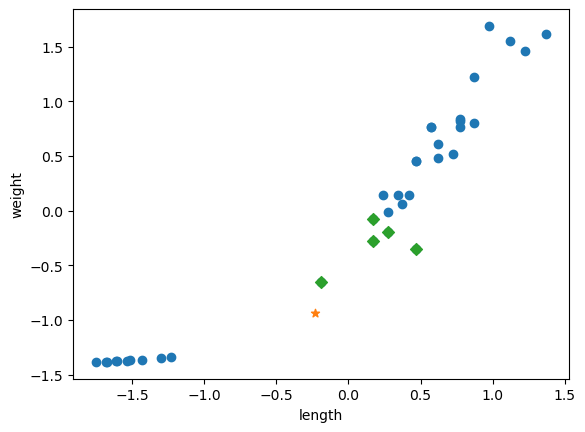

In [88]:
import matplotlib.pyplot as plt

# 25,150 좌표 확인
# test 셋(샘플)도 표준화 처리해줘야 함

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="*")
plt.scatter(train_scaled[index,0],train_scaled[index,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [89]:
import pandas as pd

iris=pd.read_excel("C:/Users/ws317/Downloads/iris_data.xlsx")

In [90]:
iris.head(3)

,Unnamed: 0,sepal length (cm),petal length (cm),target
0,0,5.1,1.4,0
1,1,4.9,1.4,0
2,2,4.7,1.3,0


In [91]:
iris[1:3]

,Unnamed: 0,sepal length (cm),petal length (cm),target
1,1,4.9,1.4,0
2,2,4.7,1.3,0


In [92]:
iris_data=iris.drop(labels=['Unnamed: 0',"target"],axis=1)

In [93]:
print(iris_data)

    sepal length (cm)  petal length (cm)
0                 5.1                1.4
1                 4.9                1.4
2                 4.7                1.3
3                 4.6                1.5
4                 5.0                1.4
..                ...                ...
95                6.7                5.2
96                6.3                5.0
97                6.5                5.2
98                6.2                5.4
99                5.9                5.1

[100 rows x 2 columns]


In [94]:
iris_target=iris.drop(labels=['Unnamed: 0',"sepal length (cm)","petal length (cm)"],axis=1)
print(iris_target)

    target
0        0
1        0
2        0
3        0
4        0
..     ...
95       2
96       2
97       2
98       2
99       2

[100 rows x 1 columns]


In [99]:
iris_data

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,6.7,5.2
96,6.3,5.0
97,6.5,5.2
98,6.2,5.4


In [98]:
iris_data.dtypes

sepal length (cm)    float64
petal length (cm)    float64
dtype: object

In [100]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(iris_data,iris_target,random_state=42)

In [101]:
print(test_target)

    target
83       2
53       2
70       2
45       0
44       0
39       0
22       0
80       2
10       0
0        0
18       0
30       0
73       2
33       0
90       2
4        0
76       2
77       2
12       0
31       0
55       2
88       2
26       0
42       0
69       2
